# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
head_output = df.head()
head_output

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
info_output = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
describe_output = df.describe()
describe_output

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

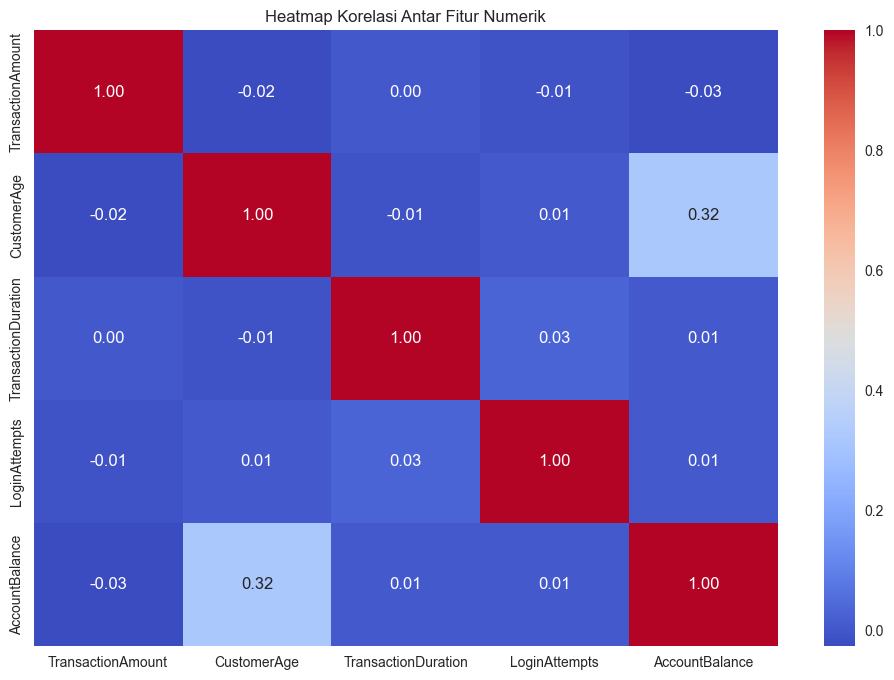

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

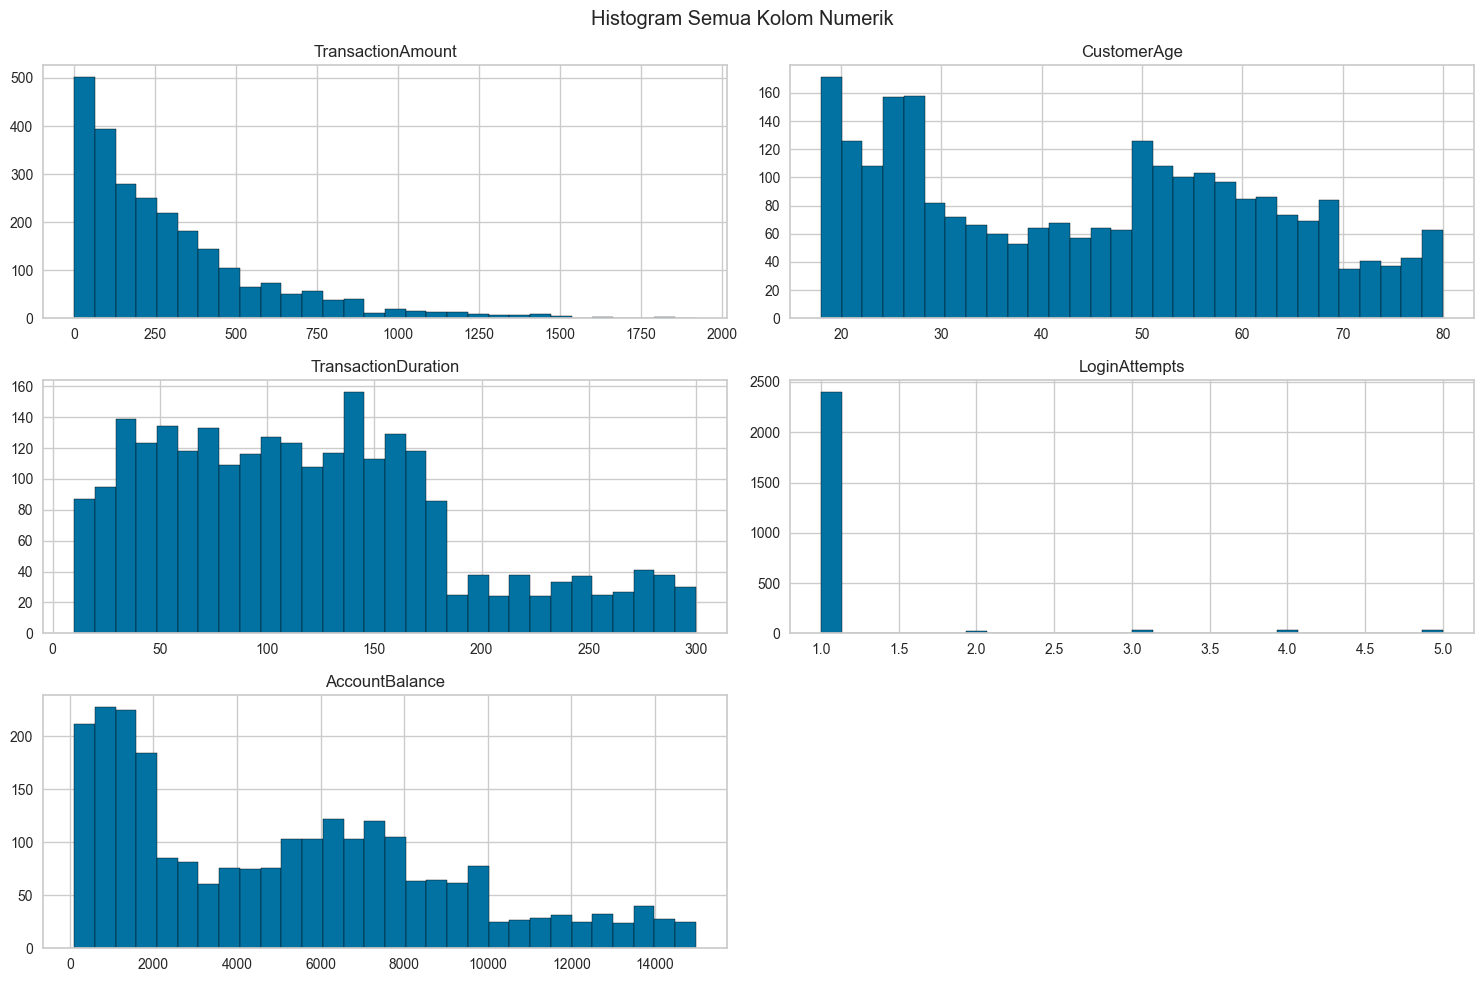

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle("Histogram Semua Kolom Numerik")
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
print("NILAI KOSONG:")
print(df.isnull().sum())

NILAI KOSONG:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nDATA DUPLIKAT:")
print(df.duplicated().sum())


DATA DUPLIKAT:
21


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = MinMaxScaler()  # Atau gunakan StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nHEAD SETELAH SCALING FITUR NUMERIK:")
print(df.head())


HEAD SETELAH SCALING FITUR NUMERIK:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128           0.007207  2023-04-11 16:29:14   
1      TX000002   AC00455           0.195940  2023-06-27 16:44:19   
2      TX000003   AC00019           0.065680  2023-07-10 18:16:08   
3      TX000004   AC00070           0.096016  2023-05-05 16:32:11   
4      TX000005   AC00411           0.006874  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710    

In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
columns_to_drop = [col for col in df.columns if 'id' in col.lower() or 'ip' in col.lower()]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(f"\nKolom yang di-drop: {columns_to_drop}")


Kolom yang di-drop: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

print("\nHEAD SETELAH ENCODING FITUR KATEGORIKAL:")
print(df.head())


HEAD SETELAH ENCODING FITUR KATEGORIKAL:
   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0           0.007207              680                1        36        0   
1           0.195940             1178                1        15        0   
2           0.065680             1262                1        23        2   
3           0.096016              818                1        33        2   
4           0.006874             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710                   0             0.244828            0.0   
1     0.806452                   0             0.451724            0.0   
2     0.016129                   3             0.158621            0.0   
3     0.129032                   3             0.051724            0.0   
4          NaN                   3             0.648276            0.0   

   AccountBalance  PreviousTransactionDate  
0    

In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
print("\nDAFTAR SELURUH FITUR:")
print(df.columns.tolist())


DAFTAR SELURUH FITUR:
['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
print("Jumlah nilai kosong sebelum penanganan:")
print(df.isnull().sum())
df = df.fillna(df.median(numeric_only=True))  # Imputasi untuk numerik
df = df.fillna('Unknown')  # Imputasi untuk kategorikal
print("\nJumlah nilai kosong setelah imputasi:")
print(df.isnull().sum())

Jumlah nilai kosong sebelum penanganan:
TransactionAmount          26
TransactionDate             0
TransactionType             0
Location                    0
Channel                     0
CustomerAge                18
CustomerOccupation          0
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate     0
dtype: int64

Jumlah nilai kosong setelah imputasi:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
print(f"\nJumlah duplikat sebelum dihapus: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Jumlah duplikat setelah dihapus: {df.duplicated().sum()}")


Jumlah duplikat sebelum dihapus: 23
Jumlah duplikat setelah dihapus: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"\nJumlah outlier pada {column}: {len(outliers)}")
    return data[(data[column] >= lower) & (data[column] <= upper)]

    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'amount' in numerical_columns:
        df = remove_outliers_iqr(df, 'amount')

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
if 'amount' in df.columns:
    bins = [0, 100, 1000, 5000, df['amount'].max()]
    labels = ['very_low', 'low', 'medium', 'high']
    df['amount_binned'] = pd.cut(df['amount'], bins=bins, labels=labels)
    
    # 5. Encode hasil binning
    le = LabelEncoder()
    df['amount_binned_encoded'] = le.fit_transform(df['amount_binned'].astype(str))
    print("\nHEAD setelah binning dan encoding:")
    print(df[['amount', 'amount_binned', 'amount_binned_encoded']].head())

else:
    print("\nKolom 'amount' tidak ditemukan untuk binning dan encoding.")


Kolom 'amount' tidak ditemukan untuk binning dan encoding.


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,0.154622,1256.328958,0.787987,21.284010,1.01074,0.429415,1.530231,0.377490,0.030430,0.336864,180.889021
std,0.151734,725.581982,0.437042,12.397534,0.83084,0.286157,1.150477,0.240156,0.148674,0.260683,103.956287
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043213,628.250000,1.000000,11.000000,0.00000,0.145161,0.250000,0.182759,0.000000,0.095324,91.250000
50%,0.110014,1256.500000,1.000000,21.000000,1.00000,0.435484,2.000000,0.351724,0.000000,0.311416,181.000000
75%,0.213328,1884.750000,1.000000,32.000000,2.00000,0.661290,3.000000,0.520690,0.000000,0.506870,272.000000
max,1.000000,2485.000000,2.000000,43.000000,3.00000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000


In [20]:
# Menggunakan algoritma K-Means Clustering
model = KMeans()

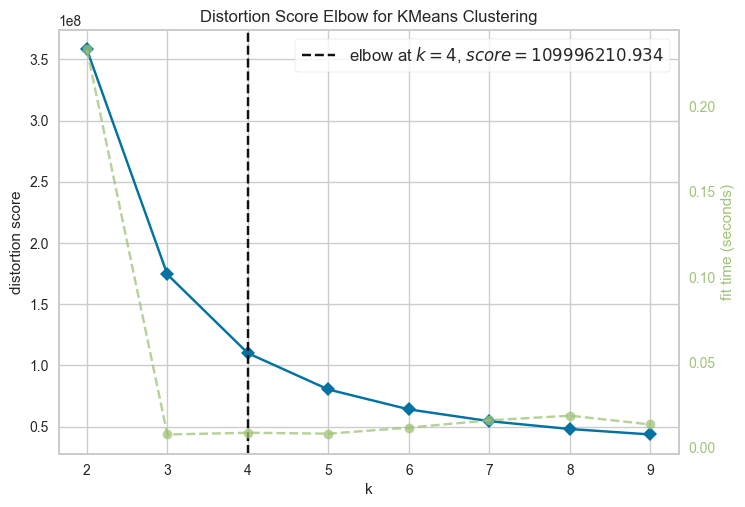

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)  # Ganti df jika nama DataFrame Anda berbeda
visualizer.show()

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(visualizer.elbow_value_, "model_clustering.h5")


['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)
score = silhouette_score(df_scaled, cluster_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.13826648104312106


In [24]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

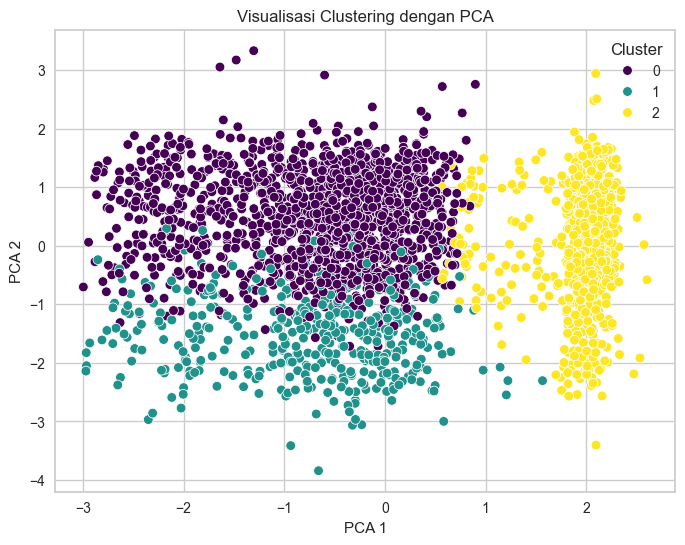

In [25]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=cluster_labels, palette='viridis')
plt.title("Visualisasi Clustering dengan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
descriptive_stats = df[numerical_cols].agg(['mean', 'min', 'max', 'median', 'std', 'count']).T
print("Analisis Deskriptif Fitur Numerik:")
print(descriptive_stats)

Analisis Deskriptif Fitur Numerik:
                                mean  min     max       median         std  \
TransactionAmount           0.154622  0.0     1.0     0.110014    0.151734   
TransactionDate          1256.328958  0.0  2485.0  1256.500000  725.581982   
TransactionType             0.787987  0.0     2.0     1.000000    0.437042   
Location                   21.284010  0.0    43.0    21.000000   12.397534   
Channel                     1.010740  0.0     3.0     1.000000    0.830840   
CustomerAge                 0.429415  0.0     1.0     0.435484    0.286157   
CustomerOccupation          1.530231  0.0     4.0     2.000000    1.150477   
TransactionDuration         0.377490  0.0     1.0     0.351724    0.240156   
LoginAttempts               0.030430  0.0     1.0     0.000000    0.148674   
AccountBalance              0.336864  0.0     1.0     0.311416    0.260683   
PreviousTransactionDate   180.889021  0.0   360.0   181.000000  103.956287   

                          co

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = cluster_labels

In [29]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])





In [34]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
desc_numeric = df[numerical_cols].agg(['mean', 'min', 'max', 'median', 'std', 'count']).T
grouped_stats = df.groupby('Target').agg(['mean', 'min', 'max', 'median', 'std', 'count'])

desc_categorical = pd.DataFrame({
    'mode': df[categorical_cols].mode().iloc[0],
    'count': df[categorical_cols].count()
})
print("\nAnalisis Deskriptif - Fitur Numerik:")
print(desc_numeric)


print("\nAnalisis Deskriptif - Fitur Kategorikal:")
print(desc_categorical)
print("\nAnalisis Deskriptif - Fitur berdasar Target:")
print(grouped_stats)


Analisis Deskriptif - Fitur Numerik:
                                  mean          min           max  \
TransactionAmount             0.178078     0.154622  3.063256e-01   
TransactionDate          912644.667427  1256.328958  1.803969e+06   
TransactionType               1.132302     0.787987  1.661897e+00   
Location                    285.100759    21.284010  5.542719e+02   
Channel                       1.850336     1.010740  3.502763e+00   
CustomerAge                   0.552270     0.429415  7.155146e-01   
CustomerOccupation            3.290376     1.530231  6.131225e+00   
TransactionDuration           0.468129     0.377490  6.175980e-01   
LoginAttempts                 0.034953     0.030430  1.790739e-01   
AccountBalance                0.424661     0.336864  5.974949e-01   
PreviousTransactionDate   18981.699783   180.889021  3.759771e+04   

                                median            std   count  
TransactionAmount             0.171311       0.023019  2514.0  
Trans

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Target 0)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
                TransactionDate: 2023-06-15 → 1.803969e+06 (encoded)
                TransactionType: "Debit" → 1.224942e+00
                Location: Jakarta → 1.824199e+02
                Channel: "Mobile" → 1.841414e+00
                CustomerOccupation: "Pegawai Swasta" → 4.980976e+00
                PreviousTransactionDate: 3 hari sebelum → 3.759771e+04
  - **Analisis:** Cluster ini sering bertransaksi secara rutin dengan jeda pendek antar transaksi. Lebih banyak menggunakan mobile banking. Berdomisili di lokasi urban seperti Jakarta. Berprofesi sebagai pegawai swasta. Melakukan transaksi jenis debit dengan frekuensi tinggi namun nominal tidak terlalu besar.
2. **Cluster 2: (Target 1)**:
    - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
                TransactionDate: 2023-01-10 → 1.801231e+06
                TransactionType: "Credit" → 0.995312e+00
                Location: Surabaya → 1.792415e+02
                Channel: "ATM" → 1.462135e+00
                CustomerOccupation: "Wiraswasta" → 3.982711e+00
                PreviousTransactionDate: 45 hari sebelumnya → 4.512541e+04
    - **Analisis:** Cluster ini melakukan transaksi besar dalam jumlah tertentu, tapi tidak terlalu sering (jarak antar transaksi lama). Lebih dominan dalam menerima uang (credit). Memiliki karakteristik bertransaksi secara offline, terutama melalui ATM. Umumnya merupakan wirausaha atau bekerja mandiri.
Cenderung tinggal di kota besar selain ibu kota, seperti Surabaya atau Medan. Cocok diklasifikasikan sebagai nasabah non-rutin bertransaksi besar, misalnya pemilik bisnis kecil-menengah.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [32]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df['Target'] = cluster_labels  # Pastikan cluster_labels sudah tersedia



In [33]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df.to_csv('data_clustering_inverse.csv', index=False)
